In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns; sns.set(style ='white', color_codes = True)
import codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
expd171 = pd.read_csv('diary17/expd171.csv', dtype={'NEWID':str,'UCC':str})
expd172 = pd.read_csv('diary17/expd172.csv', dtype={'NEWID':str,'UCC':str})
expd173 = pd.read_csv('diary17/expd173.csv', dtype={'NEWID':str,'UCC':str})
expd174 = pd.read_csv('diary17/expd174.csv', dtype={'NEWID':str,'UCC':str})

In [10]:
exp_full = [expd171, expd172, expd173, expd174]

In [24]:
# exp_full.head()

In [15]:
# columns = ['FINCNEFS', 'AGE_REF', 'CUTENURE', 'BLS_URBN', 'FAM_SIZE', 'MARITAL1', 'SEX_REF','SMOKSUPP','ALCBEV',
#           'OCCULIS1','BEEF', 'PORK', 'OTHMEAT','POULTRY','SEAFOOD']

In [138]:
fmld171 = pd.read_csv('diary17/fmld171.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld172 = pd.read_csv('diary17/fmld172.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld173 = pd.read_csv('diary17/fmld173.csv', dtype={'NEWID': str, 'HIGH_EDU': str})
fmld174 = pd.read_csv('diary17/fmld174.csv', dtype={'NEWID': str, 'HIGH_EDU': str})

In [139]:
cex = [fmld171, fmld172, fmld173, fmld174]

In [140]:
results = pd.concat(cex, ignore_index = True)

In [109]:
list(results.columns)

['INC_RNKM',
 'INC_RNK5',
 'INC_RNK4',
 'INC_RNK3',
 'INC_RNK2',
 'INC_RNK1',
 'INC_RANK',
 'NEWID',
 'AGE_REF',
 'AGE_REF_',
 'AGE2',
 'AGE2_',
 'BLS_URBN',
 'CUTENURE',
 'CUTE_URE',
 'DESCRIP',
 'DESCRIP_',
 'EARNCOMP',
 'EARN_OMP',
 'EDUC_REF',
 'EDUC0REF',
 'EDUCA2',
 'EDUCA2_',
 'EMPLTYP1',
 'EMPL_YP1',
 'EMPLTYP2',
 'EMPL_YP2',
 'FAM_SIZE',
 'FAM__IZE',
 'FAM_TYPE',
 'FAM__YPE',
 'FGVX',
 'FGVX_',
 'FINCBEFX',
 'FINC_EFX',
 'FINLWT21',
 'FIRAX',
 'FIRAX_',
 'FJSSDEDX',
 'FJSS_EDX',
 'FPVTX',
 'FPVTX_',
 'FREEMLX',
 'FREEMLX_',
 'FRRX',
 'FRRX_',
 'FS_MTHI',
 'FS_MTHI_',
 'FSS_RRX',
 'FSS_RRX_',
 'FSUPPX',
 'FSUPPX_',
 'FWAGEX',
 'FWAGEX_',
 'HRSPRWK1',
 'HRSP_WK1',
 'HRSPRWK2',
 'HRSP_WK2',
 'JFS_AMT',
 'JFS_AMT_',
 'JGRCFDMV',
 'JGRC_DMV',
 'JGRCFDWK',
 'JGRC_DWK',
 'JGROCYMV',
 'JGRO_YMV',
 'JGROCYWK',
 'JGRO_YWK',
 'LUMPX',
 'LUMPX_',
 'MARITAL1',
 'MARI_AL1',
 'NO_EARNR',
 'NO_E_RNR',
 'OCCEXPNX',
 'OCCE_PNX',
 'OCCULIS2',
 'OCCU_IS2',
 'OTHINX',
 'OTHINX_',
 'OTHRECX',
 'OTH

In [156]:
meat_column = ['BEEF',
 'PORK',
 'OTHMEAT',
 'POULTRY',
 'SEAFOOD']

In [157]:
results['meat_spent'] = sum(results[column] for column in meat_column)

In [158]:
# results['meat_spent']

In [159]:
results['meat_per_person'] = results['meat_spent']/results['FAM_SIZE']

In [ ]:
# results['FAM_SIZE'].value_counts()

In [69]:
# results['meat_per_person']

In [116]:
results['HIGH_EDU'].value_counts()

15    3038
13    2321
16    2199
12    2126
14    1277
11     536
10     148
00      13
Name: HIGH_EDU, dtype: int64

In [87]:
alc_test = results[(results['ALCBEV'] > 0)& (results['meat_per_person'] > 0)]

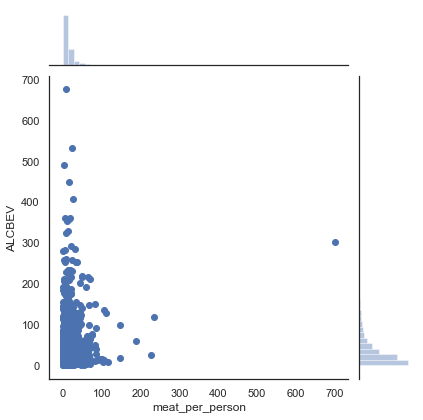

In [88]:
sns.jointplot(x= 'meat_per_person', y = 'ALCBEV', data = alc_test)

In [79]:
smoke_test = results[(results['SMOKSUPP'] > 0)& (results['meat_per_person'] > 0)]

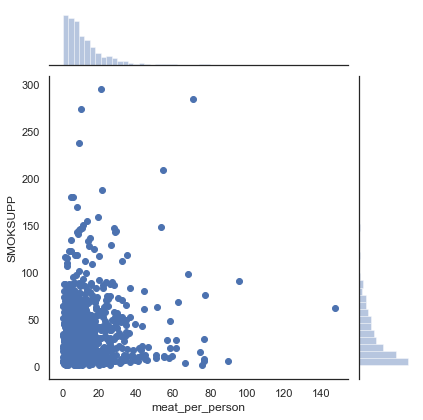

In [83]:
sns.jointplot(x= 'meat_per_person', y = 'SMOKSUPP', data = smoke_test)

In [84]:
veggie_column = ['FRSHFRUT',
 'FRSHVEG',
 'PROCFRUT',
 'PROCVEG']

In [85]:
results['veggie_spent'] = sum(results[column] for column in veggie_column)

In [86]:
results['veggie_per_person'] = results['veggie_spent']/results['FAM_SIZE']

In [89]:
veggie_test = results[(results['veggie_per_person'] > 0)& (results['meat_per_person'] > 0)]

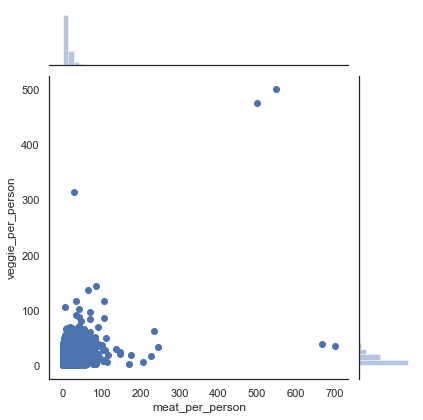

In [90]:
sns.jointplot(x= 'meat_per_person', y = 'veggie_per_person', data = veggie_test)

In [143]:
edu_df = pd.get_dummies(results['HIGH_EDU'], prefix = 'EDU')

In [144]:
edu_df.rename(mapper = codes.education, inplace= True, axis = 1)

dict_keys(['EDU_00', 'EDU_10', 'EDU_11', 'EDU_12', 'EDU_13', 'EDU_14', 'EDU_15', 'EDU_16'])


In [154]:
results = results.merge(edu_df, left_index=True, right_index=True)

In [161]:
edu_df.columns

Index(['No_schooling', 'Elementary_school', 'Some_high_school',
       'High_school_graduate', 'Some_college', 'Associate_degree',
       'Bachelor_degree', 'Graduate_degree'],
      dtype='object')

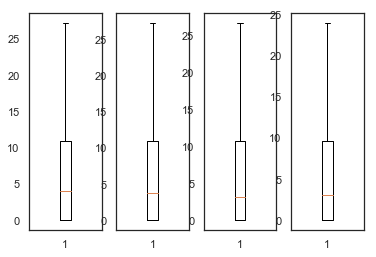

In [174]:
fig, ax = plt.subplots(1,4)
fig.subplots_adjust(hspace = 1.2)
ax[0].boxplot(results[results['Graduate_degree'] == 1]['meat_per_person'], 0, '')
ax[1].boxplot(results[results['Bachelor_degree'] == 1]['meat_per_person'], 0 , '')
ax[2].boxplot(results[results['High_school_graduate'] == 1]['meat_per_person'], 0 , '')
ax[3].boxplot(results[results['Some_college'] == 1]['meat_per_person'], 0 , '')
plt.show()